## Simulated Betting Environment using the Logistic Regression Model for Predictive Analytics

1. Load the libraries needed for the development of the betting environment.

In [13]:
import joblib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

2. Load the Logistic Regression model using joblib library.

In [14]:
# Load the LogRg Model

model = joblib.load('logistic_regression_model.pkl')

3. Load the test data 

In [15]:
# Load the test data

X_test = joblib.load('X_test.pkl')
y_test = joblib.load('y_test.pkl')

# Ensure that X_test and y_test have the same length
assert len(X_test) == len(y_test), "X_test and y_test must have the same number of rows"

4. Define a function to simulate the betting environment

In [16]:
# Simulated betting environment
def simulate_betting_environment(X_test, y_test, model, initial_balance=1000, strategy='low'):
    balance = initial_balance
    bet_history = []
    
    for i in range(len(X_test)):
        row = pd.DataFrame([X_test.iloc[i]], columns=X_test.columns)

        # Predict the outcome
        prediction_prob = model.predict_proba(row)[0]
        predicted_class = model.predict(row)[0]
        
        # Determine bet amount
        if strategy == 'low':
            if prediction_prob[1] > 0.7:  # High confidence on home win
                bet_amount = balance * 0.05  # Bet 5% of current balance
                odds = 1 / prediction_prob[1]
            else:
                continue  # Skip this game
        elif strategy == 'high':
            if prediction_prob[1] < 0.5:  # Lower confidence, higher potential payout
                bet_amount = balance * 0.02  # Bet 2% of current balance
                odds = 1 / (1 - prediction_prob[1])
            else:
                continue  # Skip this game

        # Simulate the bet
        actual_result = y_test.iloc[i]  # 1 for home win, 0 for away win
        if predicted_class == actual_result:  # Win the bet
            payout = bet_amount * odds
            balance += payout - bet_amount
        else:  # Lose the bet
            balance -= bet_amount
        
        # Record the bet
        bet_history.append({
            'Game': i,
            'Predicted_Class': predicted_class,
            'Actual_Result': actual_result,
            'Bet_Amount': bet_amount,
            'Balance': balance,
            'Odds': odds,
            'Payout': payout if predicted_class == actual_result else 0
        })

    return pd.DataFrame(bet_history), balance

5. Run the simulation

In [17]:
# run simulation 

low_risk_history, low_risk_final_balance = simulate_betting_environment(X_test, y_test, model, strategy='low')
high_risk_history, high_risk_final_balance = simulate_betting_environment(X_test, y_test, model, strategy='high')

# convert to DataFrame for easier analysis

low_risk_df = pd.DataFrame(low_risk_history)
high_risk_df = pd.DataFrame(high_risk_history)



6. Analyze the profitability

In [18]:
# Analyze profitability
def analyze_strategy(df, initial_balance):
    total_bets = len(df)
    final_balance = df.iloc[-1]['Balance'] if not df.empty else initial_balance
    total_profit = final_balance - initial_balance
    win_rate = df[df['Payout'] > 0].shape[0] / total_bets if total_bets > 0 else 0
    
    return {
        'Total Bets': total_bets,
        'Final Balance': final_balance,
        'Total Profit': total_profit,
        'Win Rate': win_rate
    }

low_risk_analysis = analyze_strategy(low_risk_df, initial_balance=1000)
high_risk_analysis = analyze_strategy(high_risk_df, initial_balance=1000)

print("Low-Risk Strategy Analysis:", low_risk_analysis)
print("High-Risk Strategy Analysis:", high_risk_analysis)


Low-Risk Strategy Analysis: {'Total Bets': 1787, 'Final Balance': np.float64(5270.063178138435), 'Total Profit': np.float64(4270.063178138435), 'Win Rate': 0.9541130386121992}
High-Risk Strategy Analysis: {'Total Bets': 1386, 'Final Balance': np.float64(3524.9603471254095), 'Total Profit': np.float64(2524.9603471254095), 'Win Rate': 0.898989898989899}


7. Visualize the results 

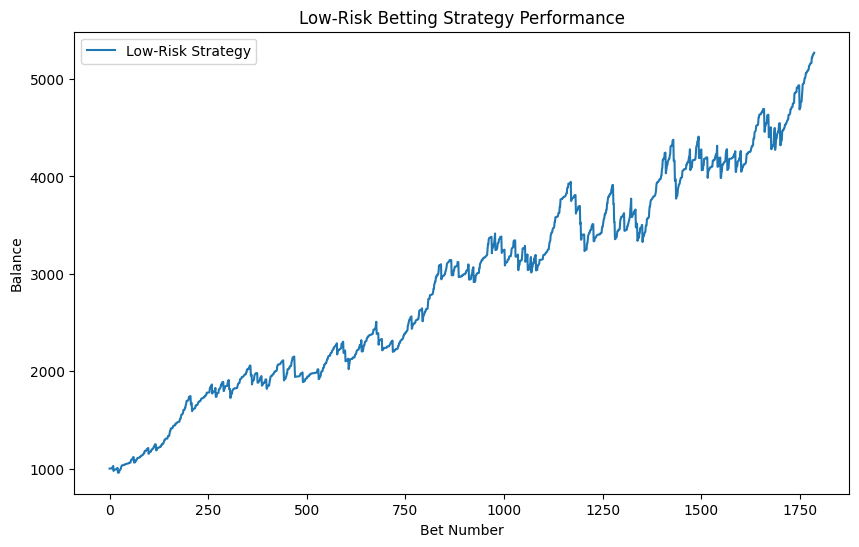

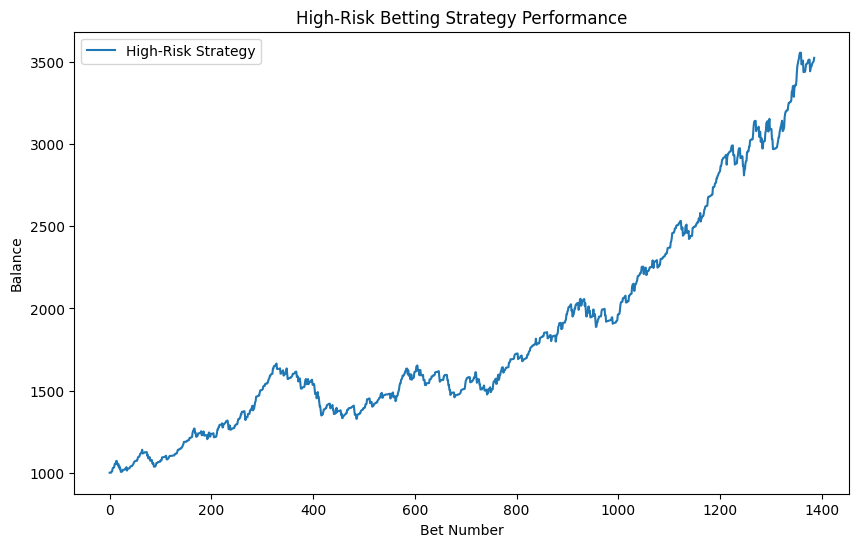

In [19]:
# Visualization
def plot_betting_strategy(df, strategy_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Balance'], label=f'{strategy_name} Strategy')
    plt.xlabel('Bet Number')
    plt.ylabel('Balance')
    plt.title(f'{strategy_name} Betting Strategy Performance')
    plt.legend()
    plt.show()

plot_betting_strategy(low_risk_df, 'Low-Risk')
plot_betting_strategy(high_risk_df, 'High-Risk')
